In [5]:
import numpy as np
from prox_tv import tv1_2d
import matplotlib.pyplot as plt

In [2]:
def eval_tv(image):
    return np.sum(np.abs(image[1:,:] - image[:-1,:])) + np.sum(np.abs(image[:,1:] - image[:,:-1]))

In [65]:
N = 1000
d1 = 80
d2 = 800
tv_norms = np.empty(N)
l1_norms = np.empty(N)
err = np.empty(N)
for n in range(N):
    im_orig = np.random.randn(d1*d2).reshape((d1,d2))
    im = tv1_2d(im_orig, w=.15, max_iters=1)
    err[n] = np.mean(np.power(im_orig - im,2))
    #im = np.random.randn(d1*d2).reshape((d1,d2))
    im /= np.linalg.norm(im)
    tv_norms[n] = eval_tv(im) / (d1*(d2-1) + d2*(d1-1))
    l1_norms[n] = np.sum(np.abs(im)) / (d1*d2)

In [66]:
err

array([0.13533806, 0.13656731, 0.13689408, 0.1356219 , 0.13606223,
       0.13540937, 0.13613929, 0.13569049, 0.13498927, 0.13548638,
       0.13511145, 0.13593804, 0.13602268, 0.13561658, 0.13552077,
       0.13605303, 0.13567877, 0.13550714, 0.13610284, 0.13547042,
       0.13556175, 0.13510594, 0.13530864, 0.1354834 , 0.13634537,
       0.13602035, 0.13612207, 0.13504392, 0.13590176, 0.13557208,
       0.1355098 , 0.13495054, 0.13593029, 0.13642961, 0.13608561,
       0.13581322, 0.1357356 , 0.13579097, 0.13632264, 0.13575847,
       0.13557519, 0.13535196, 0.1352917 , 0.13447804, 0.135897  ,
       0.13657506, 0.13558862, 0.13531263, 0.13597047, 0.13647485,
       0.13571629, 0.1362044 , 0.13554533, 0.13624288, 0.13625695,
       0.1357348 , 0.13573434, 0.13567422, 0.13525916, 0.13526798,
       0.13638818, 0.13607674, 0.13630313, 0.13628664, 0.13519991,
       0.13472845, 0.1351752 , 0.13518881, 0.13531299, 0.13465606,
       0.13553768, 0.13566249, 0.13529671, 0.13582025, 0.13589

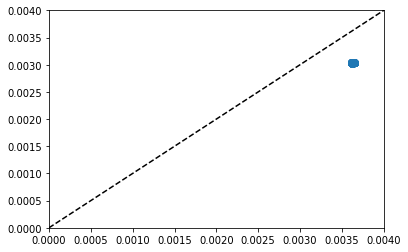

In [71]:
plt.scatter(tv_norms, l1_norms)
plt.plot([0,1], [0,1], "k--")
plt.xlim([0,.004])
plt.ylim([0,.004])
plt.show()